In [4]:
%pwd

'/home/ejmctavish/Desktop/carpentries/automation-RR-Jupyter/notebooks'

In [42]:
import pandas as pd
import numpy as np

In [26]:
VERBOSE = True #this is setting it to YES

In [27]:
cleaned_data_location = '../data/gapminder_cleaned.csv'
try:
   df = pd.read_csv(cleaned_data_location)
   if VERBOSE:
       print(df.head())
except FileNotFound:
    print("Couldn't open file. Wrong path? You tried ", cleaned_data_location )

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia


In [28]:
years = df['year'].unique()

# What is the mean life expectancy in asia through time?

In [43]:
#start with 1952
#narrow down our to asia
mask_asia = df['continent']=='asia'
df_asia = df[mask_asia]

mask_1952 = df_asia['year'] == 1952
df_1952 = df_asia[mask_1952]

value = np.mean(df_1952['lifeexp'])
value

46.31439393939394

In [58]:
VERBOSE = 0
mask_asia = df['continent']=='asia'
df_asia = df[mask_asia]
years = df_asia['year'].unique()

summary = []

for year in years:
    if VERBOSE:
        print(year)
    mask_year = df_asia['year'] == year
    df_year = df_asia[mask_year]
    value = np.mean(df_year['lifeexp'])
    summary.append(('asia', year, value))
    
summary = pd.DataFrame(summary, columns=['Continent', 'Year', 'LifeExp'])

# How could we use variables to make it easier to re-run this across continents?

In [87]:
VERBOSE = 0
summary = []

last_value = 0
for continent in df['continent'].unique():
    if VERBOSE:
            print(continent)
    mask_continent = df['continent']==continent
    df_continent  = df[mask_continent]
    for year in df_continent['year'].unique():
        if VERBOSE:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = np.mean(df_year['lifeexp'])
        summary.append((continent, year, value))

    
summary = pd.DataFrame(summary, columns=['Continent', 'Year', 'LifeExp'])

In [105]:
VERBOSE = 0
summary = []

last_value = 0
for continent in df['continent'].unique():
    if VERBOSE:
            print(continent)
    mask_continent = df['continent']==continent
    df_continent  = df[mask_continent]
    for year in df_continent['year'].unique():
        if VERBOSE:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = np.mean(df_year['pop'])
        summary.append((continent, year, value))

    
summary = pd.DataFrame(summary, columns=['Continent', 'Year', 'popultion'])

In [106]:
summary.groupby('Continent').mean()

,Year,popultion
Continent,,
africa,1979.5,9.916003e+06
americas,1979.5,2.450479e+07
asia,1979.5,7.703872e+07
europe,1979.5,1.716976e+07
oceania,1979.5,8.874672e+06


In [99]:
def add_two(input_num):
    b = input_num + 2
    return b

In [100]:
add_two(3)

5

In [102]:
add_two("hello")

TypeError: Can't convert 'int' object to str implicitly

## How would you make a function to calculate the median over time.
### HINT don't forget about DRY.
### np.median calculates medians

In [108]:
# write a function to calculate mean value per year for a continent for categories
def calculate_mean_over_time(data, category, continent):
    # Create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent #requires that data frame has a column amed continent
    data_continent = data[mask_continent]
    
    #Loop through years calculate the mean
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = np.mean(data_year[category])
        summary.append((continent, year, value))    
    summary = pd.DataFrame(summary, columns = ['continent', 'year', category])
    return summary

In [113]:
output_summary = calculate_mean_over_time(df, 'pop', 'europe')

In [114]:
output_summary

,continent,year,pop
0,europe,1952,1.393736e+07
1,europe,1957,1.459635e+07
2,europe,1962,1.534517e+07
3,europe,1967,1.603930e+07
4,europe,1972,1.668784e+07
5,europe,1977,1.723882e+07
6,europe,1982,1.770890e+07
7,europe,1987,1.810314e+07
8,europe,1992,1.860476e+07
9,europe,1997,1.896480e+07


In [119]:
def calculate_statistic_over_time(data, category, continent, func):
    """Calculate values of a statistic through time
    
    Args:
       data: a pandas data frame that inculdes a colum heading 'continent' and 'year'
       category: a string that is one of the column heaings in data
       continent: a string that is one of the values in the continent column
       func: a function that can operate on a list of numbers (e.g. np.mean)
 
    Returns:
       a pandas dataframe with headings continent, year, category
    """
    # check inputs
    assert 'continent' in data.columns.values
    assert continent in data['continent'].unique()
    
    # Create a mask that selects the continent of choice

    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]

    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = func(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary

In [120]:
help(calculate_statistic_over_time)

Help on function calculate_statistic_over_time in module __main__:

calculate_statistic_over_time(data, category, continent, func)
    Calculate values of a statistic through time
    
    Args:
       data: a pandas data frame that inculdes a colum heading 'continent' and 'year'
       category: a string that is one of the column heaings in data
       continent: a string that is one of the values in the continent column
       func: a function that can operate on a list of numbers (e.g. np.mean)
    
    Returns:
       a pandas dataframe with headings continent, year, category



In [122]:
calculate_statistic_over_time(df, 'gdppercap', 'oceania', np.mean)

,continent,year,gdppercap
0,oceania,1952,10298.085650
1,oceania,1957,11598.522455
2,oceania,1962,12696.452430
3,oceania,1967,14495.021790
4,oceania,1972,16417.333380
5,oceania,1977,17283.957605
6,oceania,1982,18554.709840
7,oceania,1987,20448.040160
8,oceania,1992,20894.045885
9,oceania,1997,24024.175170


In [129]:
import pylab as plt
import matplotlib
%matplotlib inline

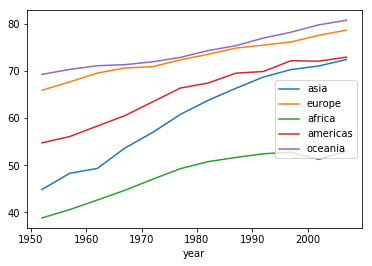

In [130]:
#use this function to plot meadian life expectancy over time across continents
continents = df['continent'].unique()
fig, ax = plt.subplots()
for continent in continents:
    output = calculate_statistic_over_time(df, 'lifeexp', continent, np.median)
    output.plot.line('year', 'lifeexp', ax=ax, label=continent)

In [131]:
# Answer to task from yesterday
summary = []
max_change = 0
max_country = None
for country in df['country'].unique():
    mask_country = df['country'] == country
    data_country = df[mask_country]
    min_year = min(data_country['year'])
    pop_first = int(data_country.loc[data_country['year'] == min_year]['pop'])
    max_year = max(data_country['year'])
    pop_last = int(data_country.loc[data_country['year'] == max_year]['pop'])
    relative_pop_change = (pop_last-pop_first)/pop_first
    summary.append((country, min_year, pop_first, max_year, pop_last, relative_pop_change))
    if relative_pop_change > max_change:
        max_change = relative_pop_change
        max_country = country
        
print(max_country)

kuwait


In [132]:
df_summary = pd.DataFrame.from_records(summary, columns=['country', 'year_min', 'pop_first', 'year_max', 'pop_second', 'rel_change'])

In [133]:
df_summary.sort_values(by=['rel_change'], ascending=False,)



,country,year_min,pop_first,year_max,pop_second,rel_change
71,kuwait,1952,160000,2007,2505559,14.659744
67,jordan,1952,607914,2007,6053193,8.957318
35,djibouti,1952,63149,2007,496374,6.860362
109,saudi arabia,1952,4005677,2007,27601038,5.890480
96,oman,1952,507833,2007,3204897,5.310927
30,cote d'ivoire,1952,2977019,2007,18013409,5.050821
46,gambia,1952,284320,2007,1688359,4.938235
75,libya,1952,1019729,2007,6036914,4.920116
7,bahrain,1952,120447,2007,708573,4.882861
68,kenya,1952,6464046,2007,35610177,4.508961
